In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
style.use("../../figures/toise.mplstyle")

In [2]:
# load the IceCube angular PDF
df = pd.read_table('icecube_angular_pdf.csv', delimiter=',')

In [3]:
# define the king PDF
def king_pdf(x, sigma, gamma):
    return (
        x
        / (sigma ** 2)
        * (1.0 - 1.0 / gamma)
        * (1 + 1.0 / (2.0 * gamma) * (x / sigma) ** 2) ** -gamma
    )

# and fit the IceCube angular PDF with the King PDF
from scipy.optimize import curve_fit
popt, pcov = curve_fit(king_pdf, xdata=df['BinCenter'], ydata=df['Fraction'])
plotter = np.linspace(0,10,100)
r = king_pdf(plotter, popt[0], popt[1])

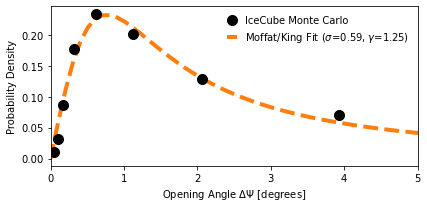

In [4]:
# make plots
fig, ax = plt.subplots()
ax.plot(plotter, r, 
    color='C1', linewidth=4, 
    linestyle='--', 
    label='Moffat/King Fit ($\sigma$={:.2f}, $\gamma$={:.2f})'.format(popt[0], popt[1]))

ax.plot(df['BinCenter'], df['Fraction'], 
    'o', markersize=10,
    color='k', 
    label='IceCube Monte Carlo')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
ax.legend([handles[idx] for idx in order],
    [labels[idx] for idx in order],
    )
    #fontsize=16)

ax.set_xlabel('Opening Angle $\Delta \Psi$ [degrees]')
ax.set_ylabel('Probability Density')
# ax.set_xlim(new_bins.min(), new_bins.max())
plt.tight_layout()
ax.set_xlim([0,5])
fig.savefig('angular_pdf_with_spline.pdf')